In [1]:
import numpy as np
import os, sys
import galsim as gs
from galsim.angle import Angle, radians
import astropy.units as u
import matplotlib.pyplot as plt

tk_path = '/Users/sweveret/repos/kl-tools/kl_tools'
sys.path.insert(0, tk_path)
from velocity import VelocityMap
import utils

%matplotlib inline

In [2]:
true_pars = {
    'g1': 0.05,
    'g2': -0.025,
    'theta_int': np.pi / 3,
    'sini': 0.8,
    'v0': 10.,
    'vcirc': 200,
    'rscale': 5,
}

alt_pars = {
    'g1': -0.0255,
    'g2': 0.1082,
    'theta_int': 1.0437,
    'sini': 0.5724,
    'v0': 10.0144,
    'vcirc': 278.4138,
    'rscale': 4.2491,
    }

pars = {
    'Nx': 30,
    'Ny': 30,
    'flux': 10,
    'hlr': 5,
    'aspect_ratio': 0.2,
}

units = {
    'v_unit': u.Unit('km/s'),
    'r_unit': u.Unit('pix')
}

## Double check that vmaps are ~the same

/var/folders/92/vynp_rhj5v555c18dmsmnrpc0000gq/T/ipykernel_96035/1480843331.py:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X, Y, vmap_true, cmap='RdBu')
/var/folders/92/vynp_rhj5v555c18dmsmnrpc0000gq/T/ipykernel_96035/1480843331.py:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X, Y, vmap_alt, cmap='RdBu')
/var/folders/92/vynp_rhj5v555c18dmsmnrpc0000gq/T/ipykernel_96035/1480843331.py:27: MatplotlibDeprecationWarning: sh

Text(0.5, 0.98, 'Velocity Map comparison')

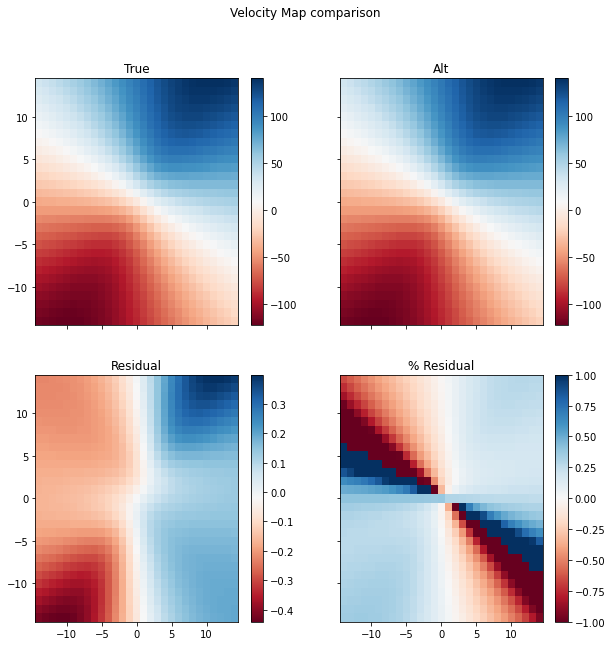

In [3]:
Nx, Ny = pars['Nx'], pars['Ny']
X, Y = utils.build_map_grid(Nx, Ny)

vmap_true_pars = {**true_pars, **units}
VMap_true = VelocityMap('default', vmap_true_pars)

vmap_alt_pars = {**alt_pars, **units}
VMap_alt = VelocityMap('default', vmap_alt_pars)

vmap_true = VMap_true('obs', X, Y)
vmap_alt  = VMap_alt('obs', X, Y)

plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(10,10))

plt.subplot(221)
plt.pcolormesh(X, Y, vmap_true, cmap='RdBu')
plt.title('True')
plt.colorbar()

plt.subplot(222)
plt.pcolormesh(X, Y, vmap_alt, cmap='RdBu')
plt.title('Alt')
plt.colorbar()

plt.subplot(223)
resid = vmap_true-vmap_alt
plt.pcolormesh(X, Y, resid, cmap='RdBu')
plt.title('Residual')
plt.colorbar()

plt.subplot(224)
plt.pcolormesh(X, Y, 100.*resid/vmap_true, cmap='RdBu',
               vmin=-1, vmax=1)
plt.title('% Residual')
plt.colorbar()

plt.suptitle('Velocity Map comparison')

## Now check that the intensity maps are the same

In [13]:
def make_imap(pars, flux, hlr, nx, ny, aspect_ratio, n=1):
    
    trunc = 4*hlr
    
    inc = Angle(np.arcsin(pars['sini']), radians)

    gal = gs.InclinedSersic(n=n, inclination=inc, half_light_radius=hlr,
                            scale_h_over_r=aspect_ratio, flux=flux, trunc=trunc)
    
    rot_angle = Angle(pars['theta_int'], radians)
    gal = gal.rotate(rot_angle)
    
    g1, g2 = pars['g1'], pars['g2']
    gal = gal.shear(g1=g1, g2=g2)
    
    image = gal.drawImage(nx=nx, ny=ny)
    
    print(f'scale={image.scale}')
    
    imap = image.array
    
    return imap

def make_imap2(pars, flux, hlr, nx, ny, aspect_ratio, n=1):
    
    trunc = 4*hlr
    
    inc = Angle(np.arcsin(pars['sini']), radians)

    gal = gs.InclinedSersic(n=n, inclination=inc, half_light_radius=hlr,
                            scale_h_over_r=aspect_ratio, flux=flux, trunc=trunc)
    
    rot_angle = Angle(pars['theta_int'], radians)
    gal = gal.rotate(rot_angle)
    
    g1, g2 = pars['g1'], pars['g2']
    gal = gal.shear(g1=g1, g2=g2)
    
    im = gs.Image(
        nx,
        ny,
        scale=1.
    )
        
    image = gal.drawImage(image=im)
    
    print(f'scale={image.scale}')
    
    imap = image.array
    
    return imap

{'g1': 0.05, 'g2': -0.025, 'theta_int': 1.0471975511965976, 'sini': 0.8, 'v0': 10.0, 'vcirc': 200, 'rscale': 5}
{'g1': -0.0255, 'g2': 0.1082, 'theta_int': 1.0437, 'sini': 0.5724, 'v0': 10.0144, 'vcirc': 278.4138, 'rscale': 4.2491}
scale=0.7770840007347621
scale=0.8352768055663973


/var/folders/92/vynp_rhj5v555c18dmsmnrpc0000gq/T/ipykernel_96035/541585492.py:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X, Y, imap_true, cmap='binary')
/var/folders/92/vynp_rhj5v555c18dmsmnrpc0000gq/T/ipykernel_96035/541585492.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X, Y, imap_alt, cmap='binary')
/var/folders/92/vynp_rhj5v555c18dmsmnrpc0000gq/T/ipykernel_96035/541585492.py:26: MatplotlibDeprecationWarning: s

Text(0.5, 0.98, 'Intensity Map comparison')

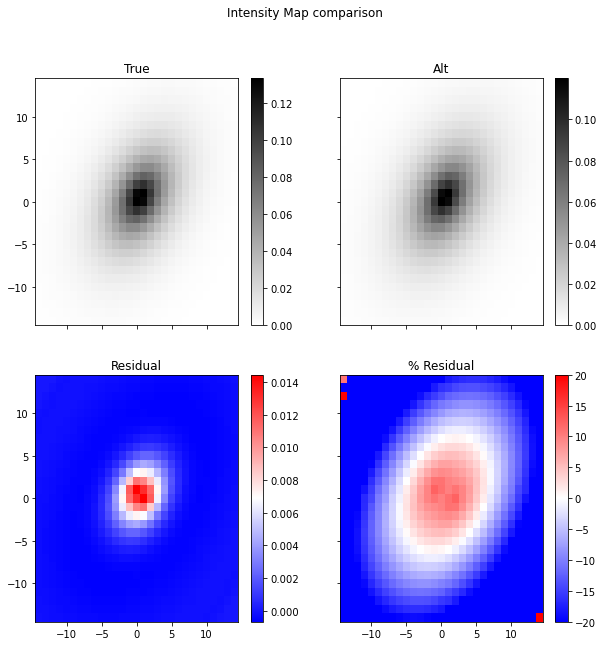

In [10]:
flux, hlr = pars['flux'], pars['hlr']
flux=10

print(true_pars)
print(alt_pars)

imap_true = make_imap(true_pars, flux, hlr, Nx, Ny, pars['aspect_ratio'])
imap_alt = make_imap(alt_pars, flux, hlr, Nx, Ny, pars['aspect_ratio'])

cmap = 'bwr'

plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(10,10))

plt.subplot(221)
plt.pcolormesh(X, Y, imap_true, cmap='binary')
plt.title('True')
plt.colorbar()

plt.subplot(222)
plt.pcolormesh(X, Y, imap_alt, cmap='binary')
plt.title('Alt')
plt.colorbar()

plt.subplot(223)
resid = imap_true-imap_alt
plt.pcolormesh(X, Y, resid, cmap=cmap)
plt.title('Residual')
plt.colorbar()

plt.subplot(224)
plt.pcolormesh(X, Y, 100.*resid/imap_true, cmap=cmap,
               vmin=-20, vmax=20)
plt.title('% Residual')
plt.colorbar()

plt.suptitle('Intensity Map comparison')

## Compute slices

{'g1': 0.05, 'g2': -0.025, 'theta_int': 1.0471975511965976, 'sini': 0.8, 'v0': 10.0, 'vcirc': 200, 'rscale': 5}
{'g1': -0.0255, 'g2': 0.1082, 'theta_int': 1.0437, 'sini': 0.5724, 'v0': 10.0144, 'vcirc': 278.4138, 'rscale': 4.2491}
scale=0.7770840007347621
scale=1.0


/var/folders/92/vynp_rhj5v555c18dmsmnrpc0000gq/T/ipykernel_96035/24515047.py:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X, Y, imap1, cmap='binary')
/var/folders/92/vynp_rhj5v555c18dmsmnrpc0000gq/T/ipykernel_96035/24515047.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X, Y, imap2, cmap='binary')
/var/folders/92/vynp_rhj5v555c18dmsmnrpc0000gq/T/ipykernel_96035/24515047.py:26: MatplotlibDeprecationWarning: shading='fl

Text(0.5, 0.98, 'Intensity Map comparison')

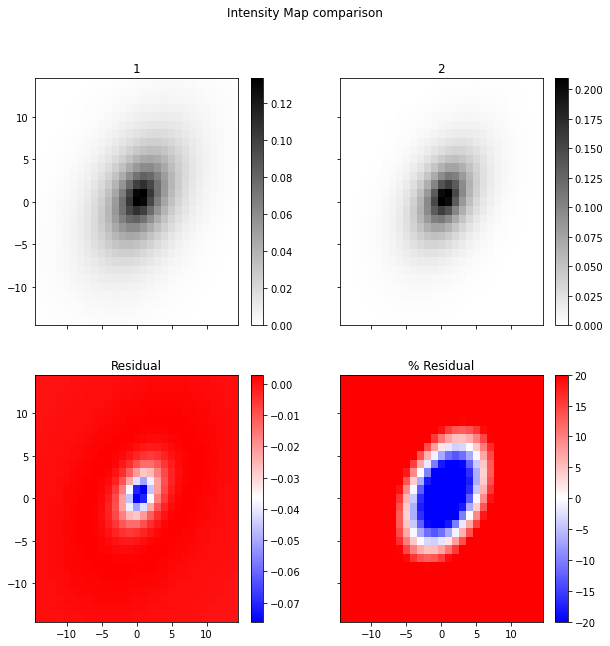

In [14]:
flux, hlr = pars['flux'], pars['hlr']
flux=10

print(true_pars)
print(alt_pars)

imap1 = make_imap(true_pars, flux, hlr, Nx, Ny, pars['aspect_ratio'])
imap2 = make_imap2(true_pars, flux, hlr, Nx, Ny, pars['aspect_ratio'])

cmap = 'bwr'

plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(10,10))

plt.subplot(221)
plt.pcolormesh(X, Y, imap1, cmap='binary')
plt.title('1')
plt.colorbar()

plt.subplot(222)
plt.pcolormesh(X, Y, imap2, cmap='binary')
plt.title('2')
plt.colorbar()

plt.subplot(223)
resid = imap1-imap2
plt.pcolormesh(X, Y, resid, cmap=cmap)
plt.title('Residual')
plt.colorbar()

plt.subplot(224)
plt.pcolormesh(X, Y, 100.*resid/imap1, cmap=cmap,
               vmin=-20, vmax=20)
plt.title('% Residual')
plt.colorbar()

plt.suptitle('Intensity Map comparison')